# Analysis of business parameters of the mobile application

**Project objective**

Based on the data it is necessary to answer following questions: users' location and operation system they use, costs of attraction of users from various advertising channels, users'revenue, factors that prevent attracting the users

**Input data**

*Data on users attracted from May 1 to October 27, 2019:*

- server log with data about users' visits (visits_info_short.csv file): User Id, Region, Device, Channel, Session Start, Session End; 

- purchases for the period (file orders_info_short.csv): User Id, Event Dt — event date, Revenue;

- advertising expenses (file costs_info_short.csv): Channel — identification of the advertising source,Dt — date of the advertising campaign, Costs — costs of advertising campaign.

## Data overview and wrangling

### Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

pd.options.mode.chained_assignment = None # disabling Pandas warnings


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format # only 2 decimal places will be displayed

In [3]:
# reading and saving files to df

try:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

In [4]:
#  visits overview
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [5]:
# overview of orders dataframe

orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [6]:
# overview of costs dataframe

costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt         Channel  costs
0     2019-05-01        FaceBoom 113.30
1     2019-05-02        FaceBoom  78.10
2     2019-05-03        FaceBoom  85.80
3     2019-05-04        FaceBoom 136.40
4     2019-05-05        FaceBoom 122.10
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds   4.00
1796  2019-10-24  lambdaMediaAds   6.40
1797  2019-10-25  lambdaMediaAds   8.80
1798  2019-10-26  lambdaMediaAds   8.80
1799  2019-10-27  lambdaMediaAds  12.00

[1800 rows x 3 columns]

**Conclusion**

There are no empty cells. The data types in columns are not always correct. Check the data for duplicates need to be performed.

### Data wrangling

In [7]:
# changing of data names
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()

In [8]:
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [9]:
# changing time data time

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
# duplicates check

display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

### Dataframe visits

In [11]:
#defining the year and month of the session start and adding the corresponding columns
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month

In [12]:
#finding the number of sessions and the number of users
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'user_id': ['count', 'nunique']}
)

In [13]:
# renaming columns
sessions_per_user.columns = ['n_sessions', 'n_users']

# finding session per user
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2019         5                   45765    27111               1.69
             6                   44623    26042               1.71
             7                   47970    26672               1.80
             8                   55996    31064               1.80
             9                   56628    31871               1.78
             10                  58919    31175               1.89

The number of unique users grows during the study period, as does the number of sessions. The number of sessions is more than one, but less than two.

Average, minutes: 30.00151446214544
Median, minutes: 20.733333333333334


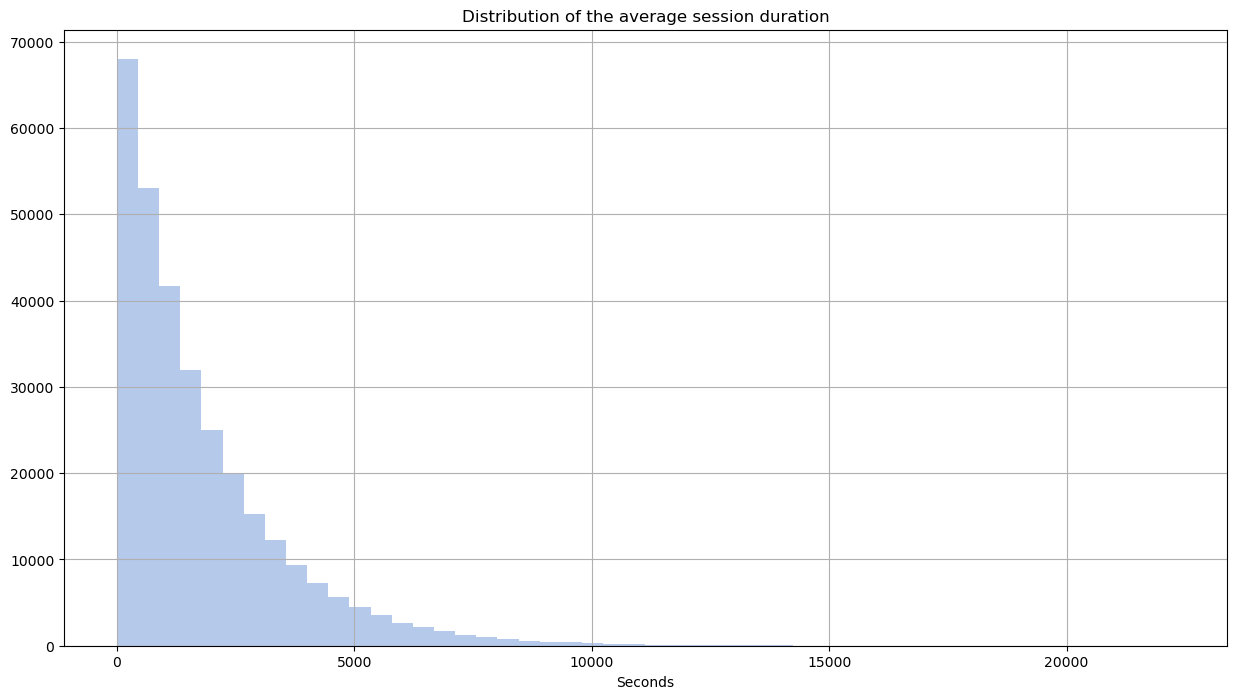

In [14]:
# average length of session
visits['session_duration_sec'] = (
    visits['session_end'] - visits['session_start']
).dt.seconds

plt.style.use('seaborn-muted') #https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

print(f'Average, minutes: {visits.session_duration_sec.mean()/60}')
print(f'Median, minutes: {visits.session_duration_sec.median()/60}')


# graphic
visits['session_duration_sec'].hist(bins=50, alpha=0.4, figsize=(15,8))
plt.title('Distribution of the average session duration')
plt.xlabel('Seconds')
plt.show()

The time spent in the application looks like an exponential distribution with a peak near zero. The average session lasts around 30 minutes, the median - about 21.

### Dataframe orders

In [15]:
# unique values
orders.revenue.unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

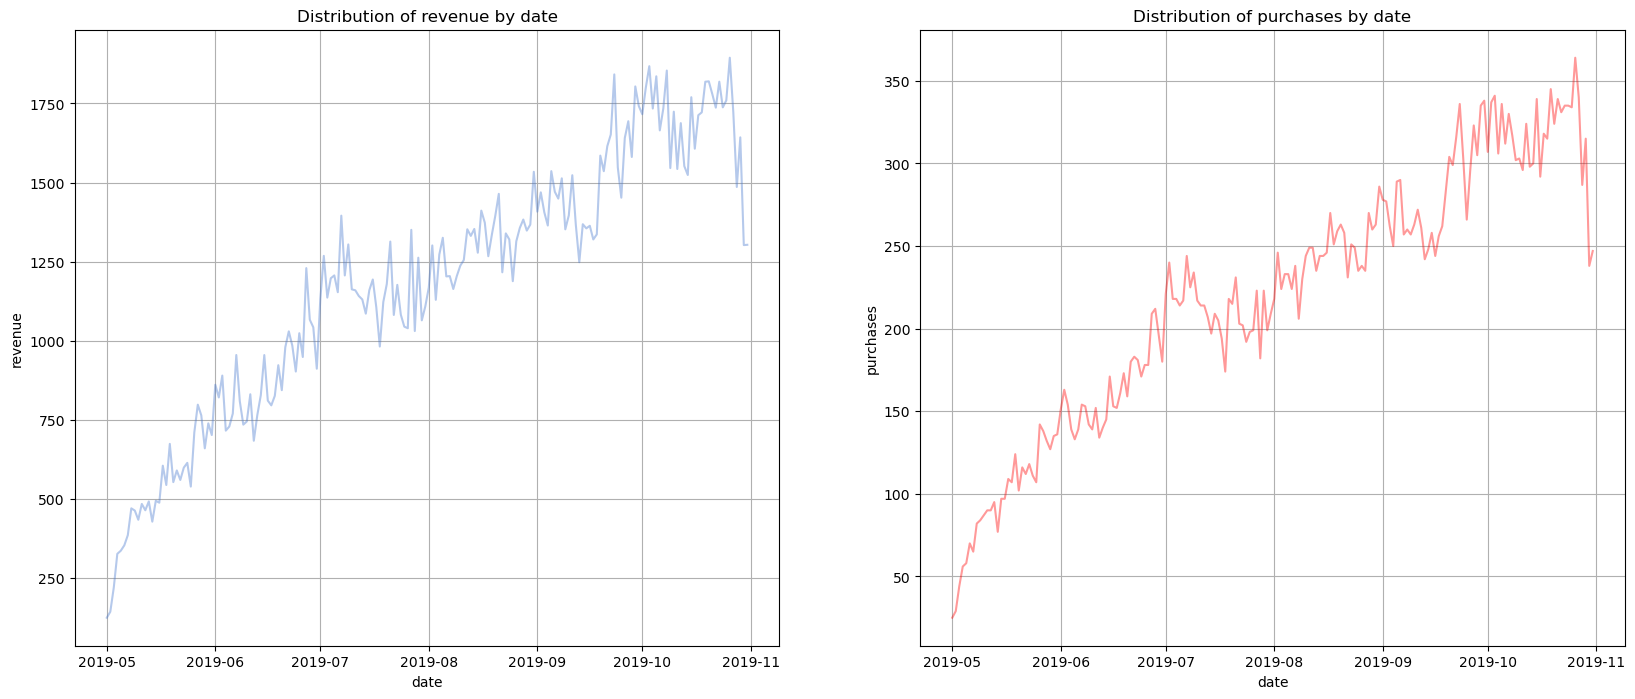

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='sum'
    ), alpha=0.4
)
ax1.grid(True)
ax1.set_title('Distribution of revenue by date')
ax1.set_xlabel('date')
ax1.set_ylabel('revenue')

ax2.plot(
    orders.pivot_table(
        index=orders.event_dt.astype('datetime64[D]'),
        values='revenue',
        aggfunc='count'),
    color='r', 
    alpha=0.4
)

ax2.grid(True)
ax2.set_title('Distribution of purchases by date')
ax2.set_ylabel('purchases')
ax2.set_xlabel('date')
plt.show()

The amount of revenue and the number of purchases are growing.

### Dataframe costs

<AxesSubplot:xlabel='channel'>

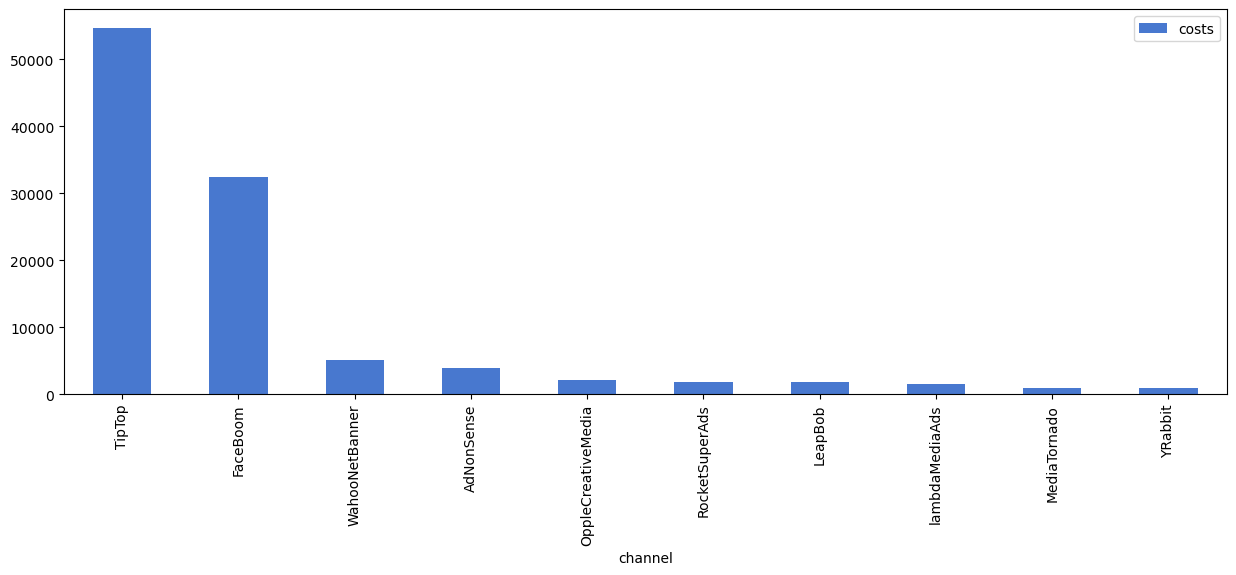

In [17]:
# costs by channel

costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)\
     .plot(kind='bar', figsize=(15,5))

**Conclusion**

- Three dataframes visits, orders and costs have been loaded.
- Column names are reduced to lowercase, spaces are also replaced with underscores.
- The number of unique users grows during the study period, as well as the number of sessions. The average number of sessions for user is more than one, but less than two.
- The time spent by users in the application has an exponential distribution with a peak near zero. The average session lasts around 30 minutes, the median is about 21.
- The amount of revenue and the number of purchases are growing.
- The main costs go to advertising in TipTop and FaceBoom.

## Setting functions for calculating and analyzing LTV, ROI, retention and conversion.

**functions for calculating metric values:**

get_profiles() — user profile creation function,

get_retention() — calculation Retention Rate,

get_conversion() — calculation of conversion,

get_ltv() — calculation of LTV.

**functions for plotting:**

filter_data() — filtering of data,

plot_retention() — plotting of Retention Rate,

plot_conversion() — plotting конверсии,

plot_ltv_roi — plotting of LTV and ROI.

In [18]:
# user profile creation function

def get_profiles(sessions, orders, ad_costs):

    # finding the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combining money spent on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # diviing advertising by costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding aquisition costs to profiles dataframe
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
#  Retention Rate function

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding column payer to dimensions list
    dimensions = ['payer'] + dimensions

    # excluding users, that has not survived till horizon analysis date
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # getting raw data
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    #function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # retention dataframe
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # retention dynamics dataframe
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning all the data
    return result_raw, result_grouped, result_in_time

In [20]:
# conversion function

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users, that has not survived till horizon analysis date
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determinining the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # grouping by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    #function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # dividing each "cell" in a row by the size of the cohort
        # getting conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # getting conversion dataframe
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #for the conversion dynamics table, removing 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    #getting a conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning both dataframes and raw data
    return result_raw, result_grouped, result_in_time

In [21]:
# functions of calculation of LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # excluding users, that has not survived till horizon analysis date
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
   # adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    #calculating the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # grouping by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    #function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # finding amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculating cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        #combining the cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculating LTV: dividing each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # excluding all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculating ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']
        # cutting by lifetime
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # returning LTV and ROI
        return result, roi

    # getting LTV and ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    #getting tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  #  LTV
        result_in_time,  # dynamics LTV
        roi_grouped,  # ROI
        roi_in_time,  # dynamics ROI
    )

In [22]:
# data filtering function

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# vizualization of retention

def plot_retention(retention, retention_history, horizon, window=7):
     
    plt.style.use('seaborn-muted')
    # size of figure
    plt.figure(figsize=(15, 10))

    # excluding cohort sizes and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # leaving only the necessary lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # adding the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # the plot table has two columns and two rows, four cells
    # for the first cell,  building retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')
    
    # in the second cell, we build retention curves for non-paying
    # vertical axis — from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell — the dynamics of retention of paying users
    ax3 = plt.subplot(2, 2, 3)
    # getting the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    #filtering the data and building plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of paying users for day {} '.format(
            horizon
        )
    )

    # in the fourth cell — dynamics of non-paying users retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    #filtering the data and building plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of non-paying users for day {} '.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# conversion vizualization

def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.style.use('seaborn-muted')
    # plot sizee
    plt.figure(figsize=(15, 5))

    # excluding cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    #leaving only the necessary lifetime in the dynamics table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # 1 plot — conversion
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Users conversion')

    # 2 plot — dynamics of conversion
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the columns of the pivot table will be all the columns of the index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Users conversion dynamics for day {} '.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# LTV and ROI visualization

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.style.use('seaborn-muted')
    # figure size
    plt.figure(figsize=(20, 20))

    # excluding cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # for ltv dynamics table, leaving only the necessary lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # saving the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # excluding cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    #in the roi dynamics table, leaving only the necessary lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first plot —  ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second plot — dynamics of ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    #the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('LTV dynamics for day {} '.format(horizon))

    # third plot — dynamics of cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    #the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of the cost of attracting users')

    # fourth —  roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth — dynamics of roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # the columns of the pivot table will be all the columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Date of attraction')
    plt.title('ROI dynamics for day {} '.format(horizon))

    plt.tight_layout()
    plt.show()

## Data analysis

### Users profiles

In [26]:
#using previously created function
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23  
5  2019-05-09 2019-05-01  False              0.00  
6  2019-08-16 2019-08-01  False              0.00  
7  2019-06-30 2019-06-01   True              1.01  
8  2019-05-11 2019-05-01  False              1.13  
9  2019-05-11 2019-05-01  False              0.25

Let's set the moment and horizon of data analysis. The analysis should be carried out as of November 1, 2019, but since the data is available for October 27, 2019, let's take this date. We assume that users should pay off no later than two weeks after the attraction.

In [27]:
observation_date = profiles['dt'].max()  # moment of the analysis
analysis_horizon = 14  # horizon of the analysis

# min date of attraction
min_analysis_date = profiles['dt'].min()

# max date of attraction
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1) 

print(f'min date of attraction: {min_analysis_date}')
print(f'max date of attraction: {max_analysis_date}')

min date of attraction: 2019-05-01
max date of attraction: 2019-10-14


### Users' distribution by country

Let's find out from which countries users come to the application and which country accounts for the most paying users. Let's build a table reflecting the number of users and the share of payers from each country and visualize it.

In [28]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
region

payer          not_payer  payer
region                         
United States      93100   6902
UK                 16875    700
France             16787    663
Germany            14365    616

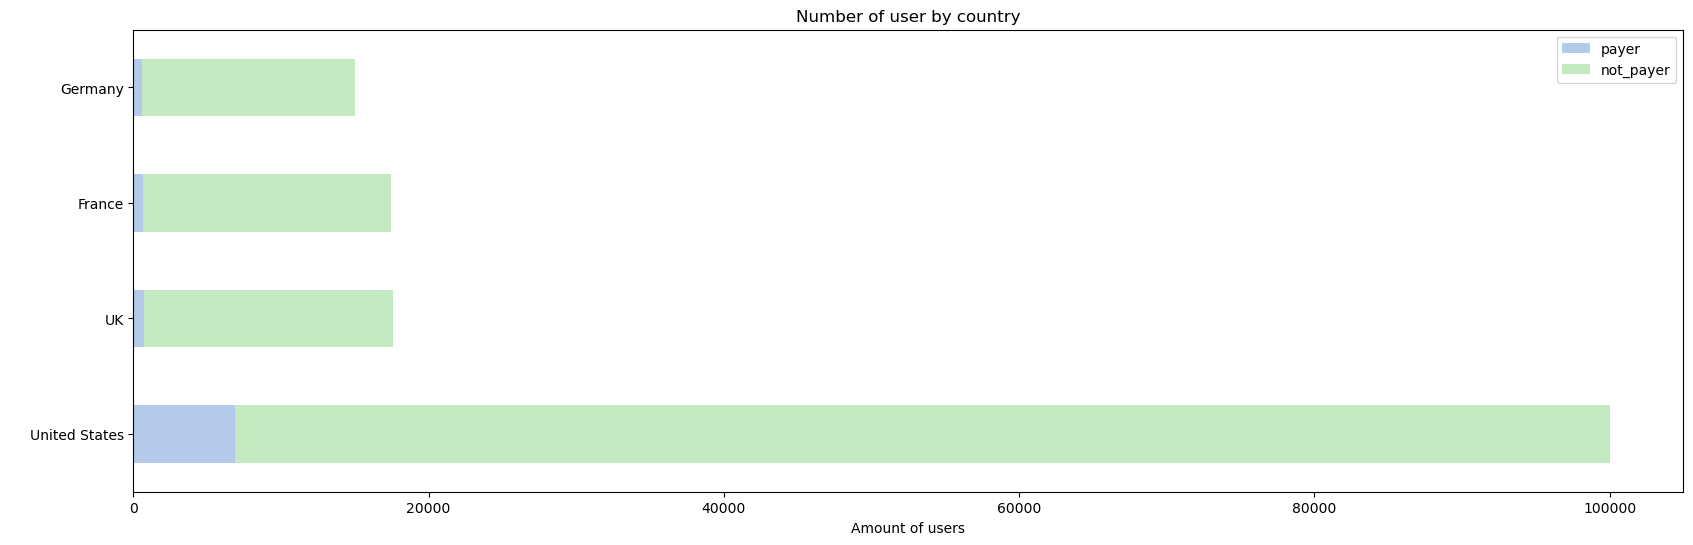

In [29]:
fig, ax = plt.subplots(figsize=(20, 6 ))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Amount of users')
ax.set_ylabel(' ')
ax.set_title('Number of user by country')
plt.show()

In [30]:
region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

payer          not_payer  payer  payer_share
region                                      
United States      93100   6902         6.90
UK                 16875    700         3.98
France             16787    663         3.80
Germany            14365    616         4.11

Most of the attracted users are from the USA. The USA is the leader in the number of paying users.

### Distribution of users by device

Let's build a table reflecting the number of users and the share of paying users for each device and visualize it.

In [31]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

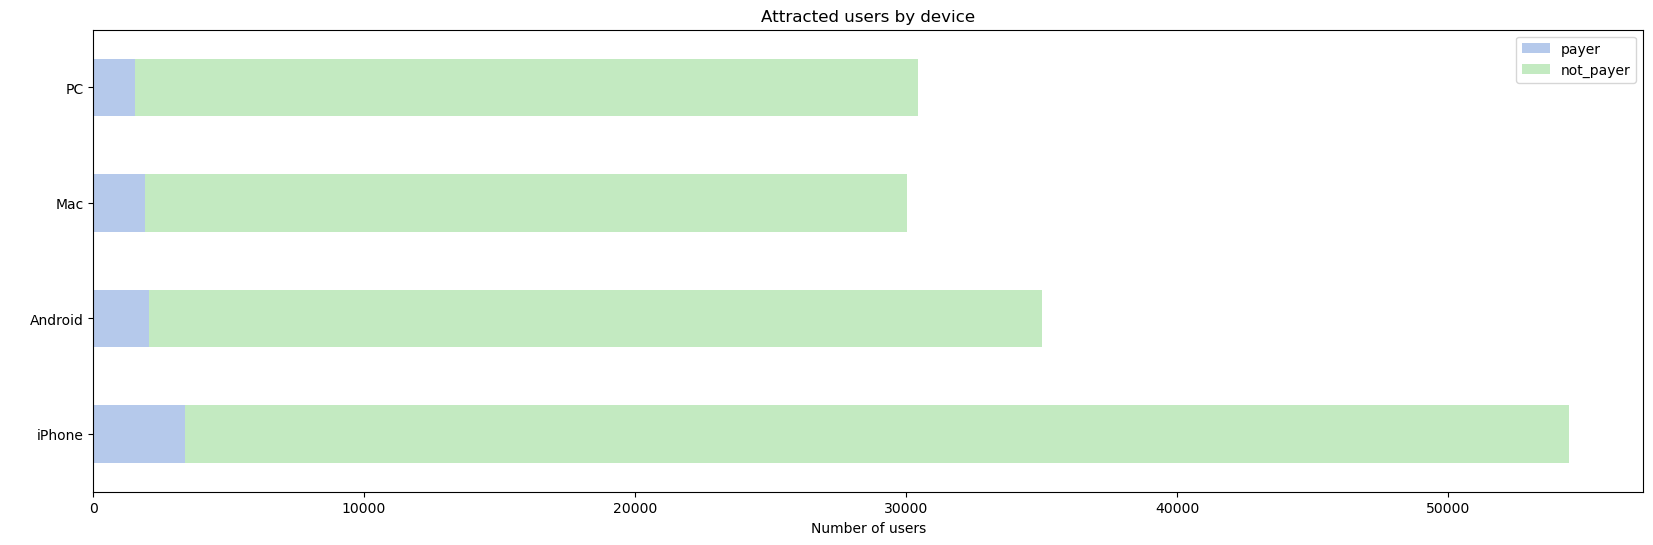

In [32]:
fig, ax = plt.subplots(figsize=(20, 6))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Number of users')
ax.set_ylabel(' ')
ax.set_title('Attracted users by device')
plt.show()

In [33]:
device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

payer    not_payer  payer  payer_share
device                                
iPhone       51097   3382         6.21
Android      32982   2050         5.85
Mac          28130   1912         6.36
PC           28918   1537         5.05

### Channels for attracting users

Let's study the advertising sources of attraction and determine the channels from which paying users come. Let's build a table reflecting the number of users and the share of payers for each channel of attraction and visualize it.

In [34]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

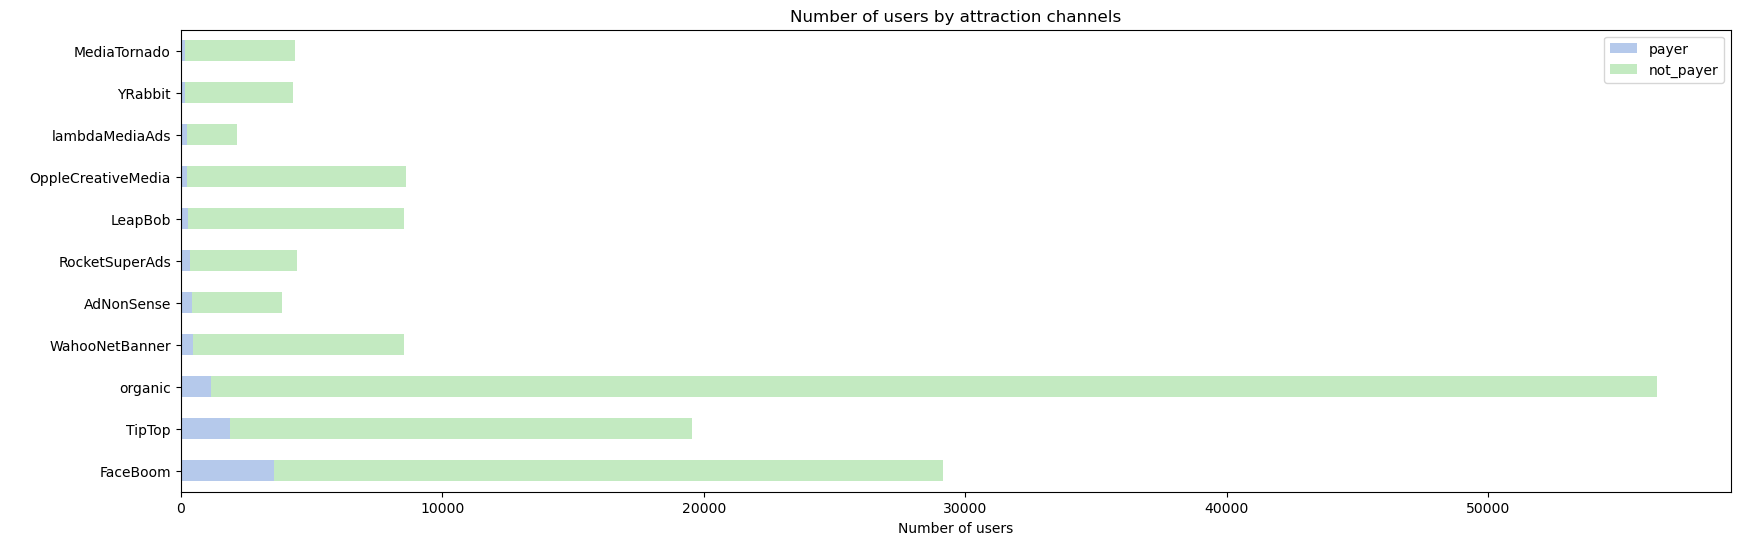

In [35]:
fig, ax = plt.subplots(figsize=(20, 6))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Number of users')
ax.set_ylabel(' ')
ax.set_title('Number of users by attraction channels')
plt.show()

In [36]:
channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
display(channel.sort_values(by='payer_share', ascending=False))

payer               not_payer  payer  payer_share
channel                                          
FaceBoom                25587   3557        12.20
AdNonSense               3440    440        11.34
lambdaMediaAds           1924    225        10.47
TipTop                  17683   1878         9.60
RocketSuperAds           4096    352         7.91
WahooNetBanner           8100    453         5.30
YRabbit                  4147    165         3.83
MediaTornado             4208    156         3.57
LeapBob                  8291    262         3.06
OppleCreativeMedia       8372    233         2.71
organic                 55279   1160         2.06

## Marketing

### Analysis of advertising costs

In [37]:
display(f'Total advertising costs: {costs.costs.sum().round()}')

'Total advertising costs: 105497.0'

In [38]:
costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

costs
channel                     
TipTop             54,751.30
FaceBoom           32,445.60
WahooNetBanner      5,151.00
AdNonSense          3,911.25
OppleCreativeMedia  2,151.25
RocketSuperAds      1,833.00
LeapBob             1,797.60
lambdaMediaAds      1,557.60
MediaTornado          954.48
YRabbit               944.22

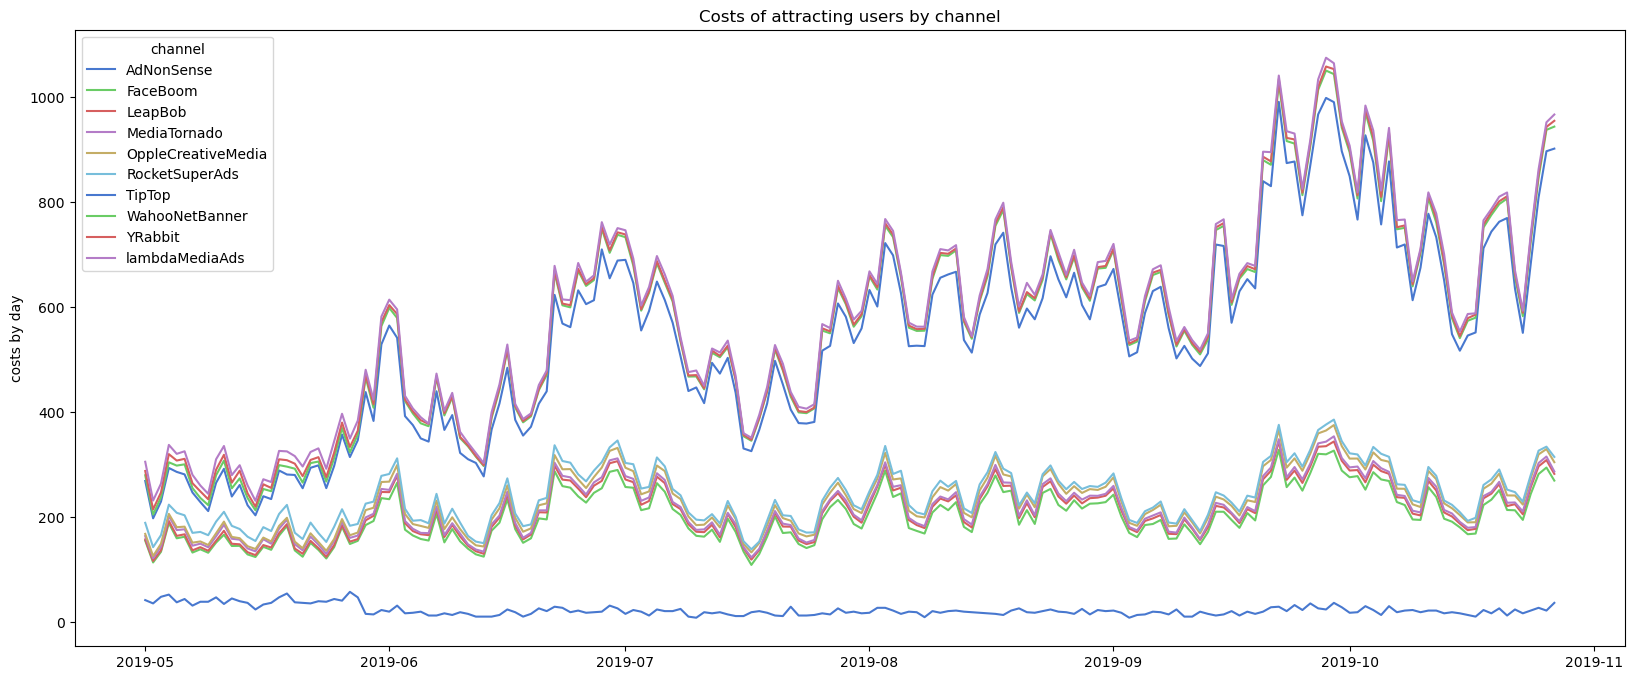

In [39]:
# plot of costs by channel

fig, ax = plt.subplots(figsize=(20, 8))

(costs
 .pivot_table(
    index=costs.dt,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_title('Costs of attracting users by channel')
ax.set_ylabel('costs by day')
ax.set_xlabel(' ')
plt.show()

In [40]:
cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost   1.13
dtype: float64

In [41]:
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )

<AxesSubplot:xlabel='channel'>

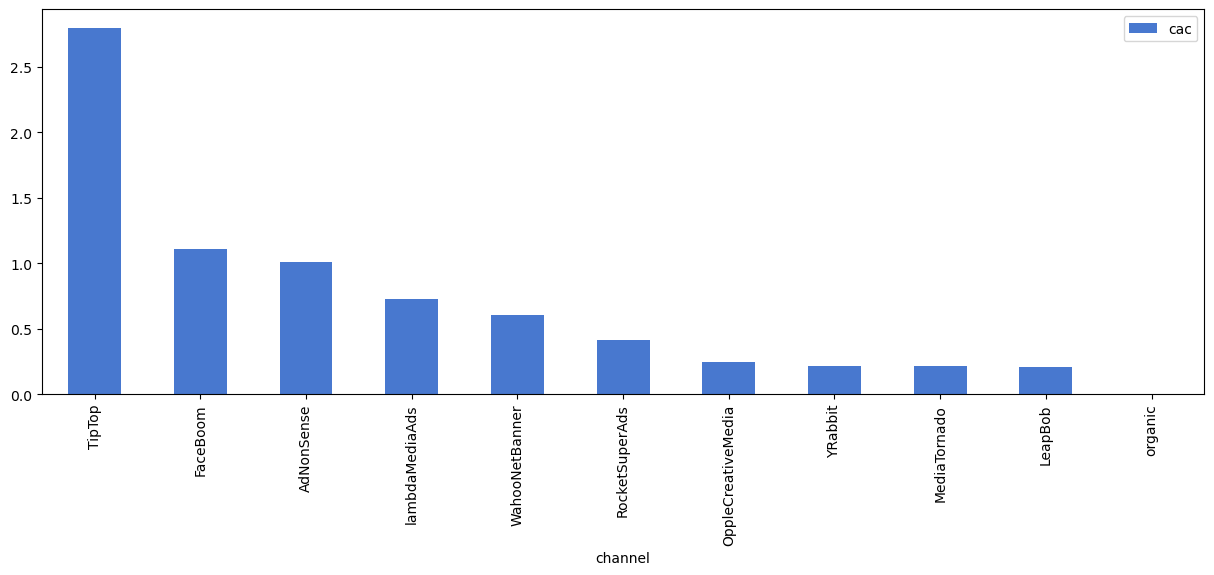

In [42]:
cac_channel.plot(kind='bar', figsize=(15,5))

**Conclusion**

- Total advertising costs: 105497.0
- On the cost plot for the channels of attraction there is a tendency to increase costs
- Average price of attraction 1.13
- The most expensive channels TipTop, FaceBoom and AdNonSense

### Evaluation of the payback of advertising

### Payback of advertising

In [43]:
#excluding users who did not come through advertising
profiles = profiles.query('channel != "organic"')

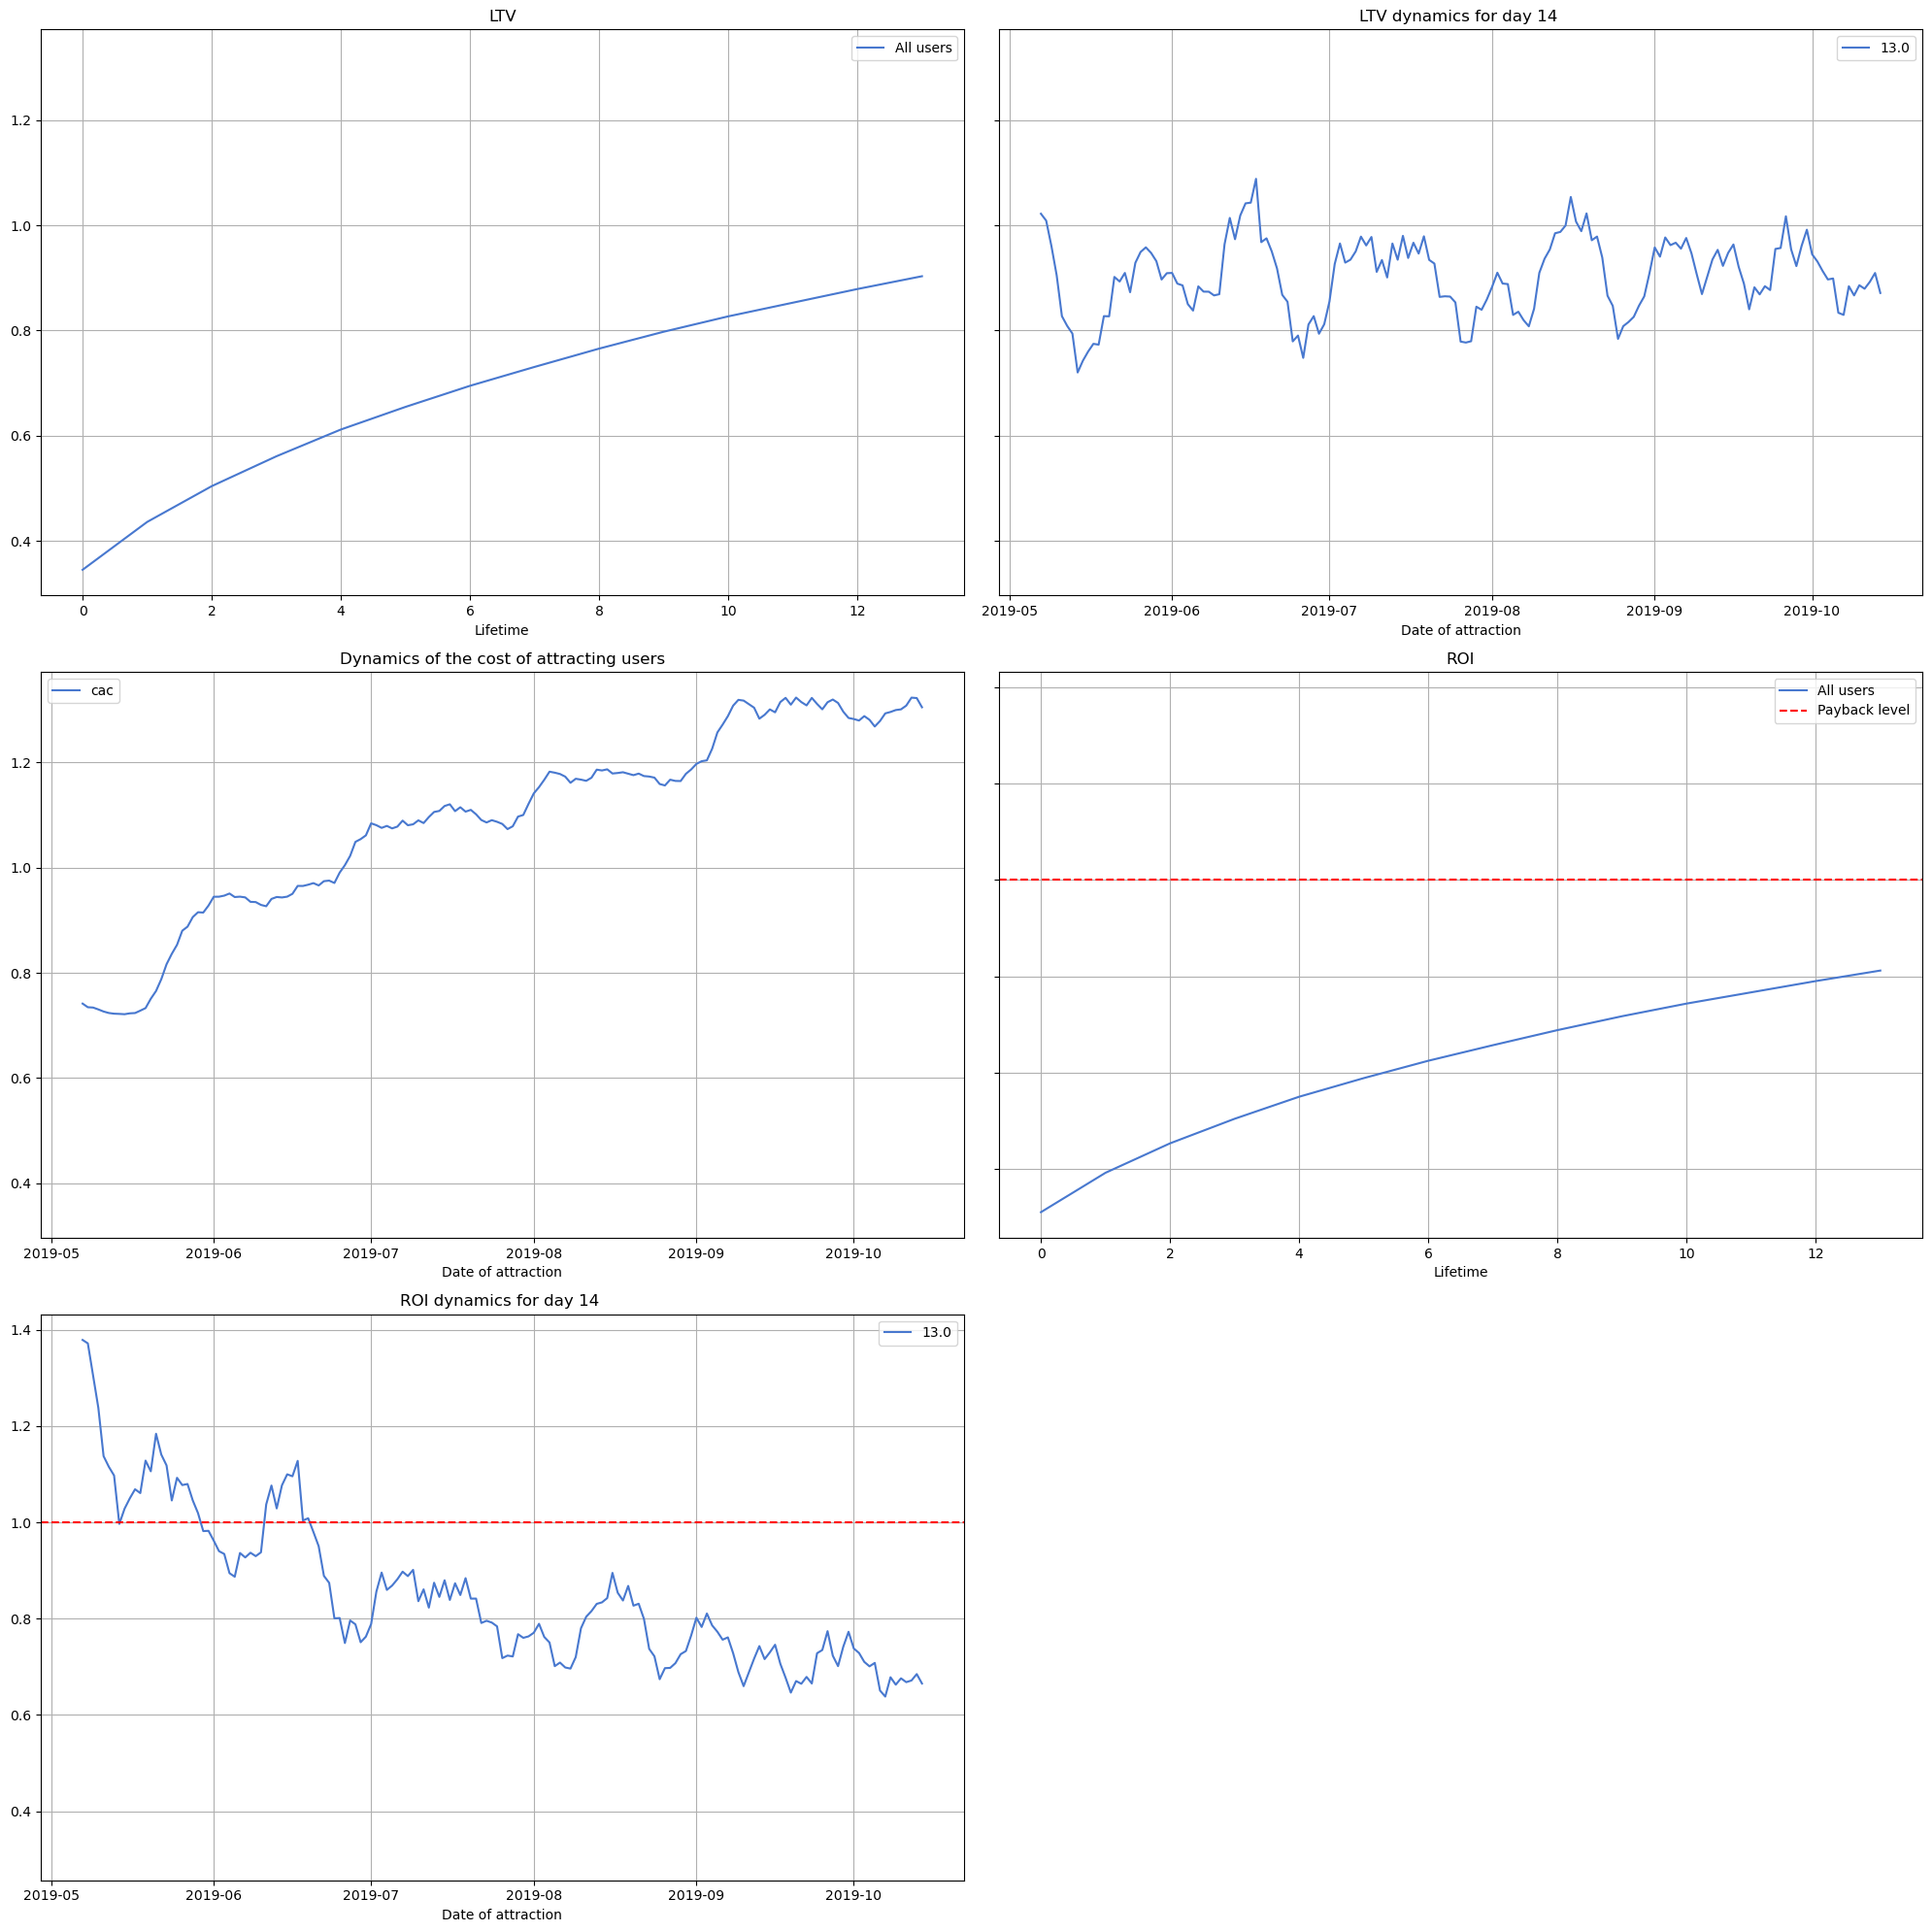

In [44]:
# calculating LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# building plots
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

**Conclusion**

- advertising by the 14th day and beyond does not pay off;
- CAC is growing, the cost of attracting users is growing;
- starting from June, attracted customers stop paying off in two-week lifetime;
- LTV is stable, and CAC is growing, probably this is showing of the growth of competition on the channel.

### Payback of advertising through advertising channels

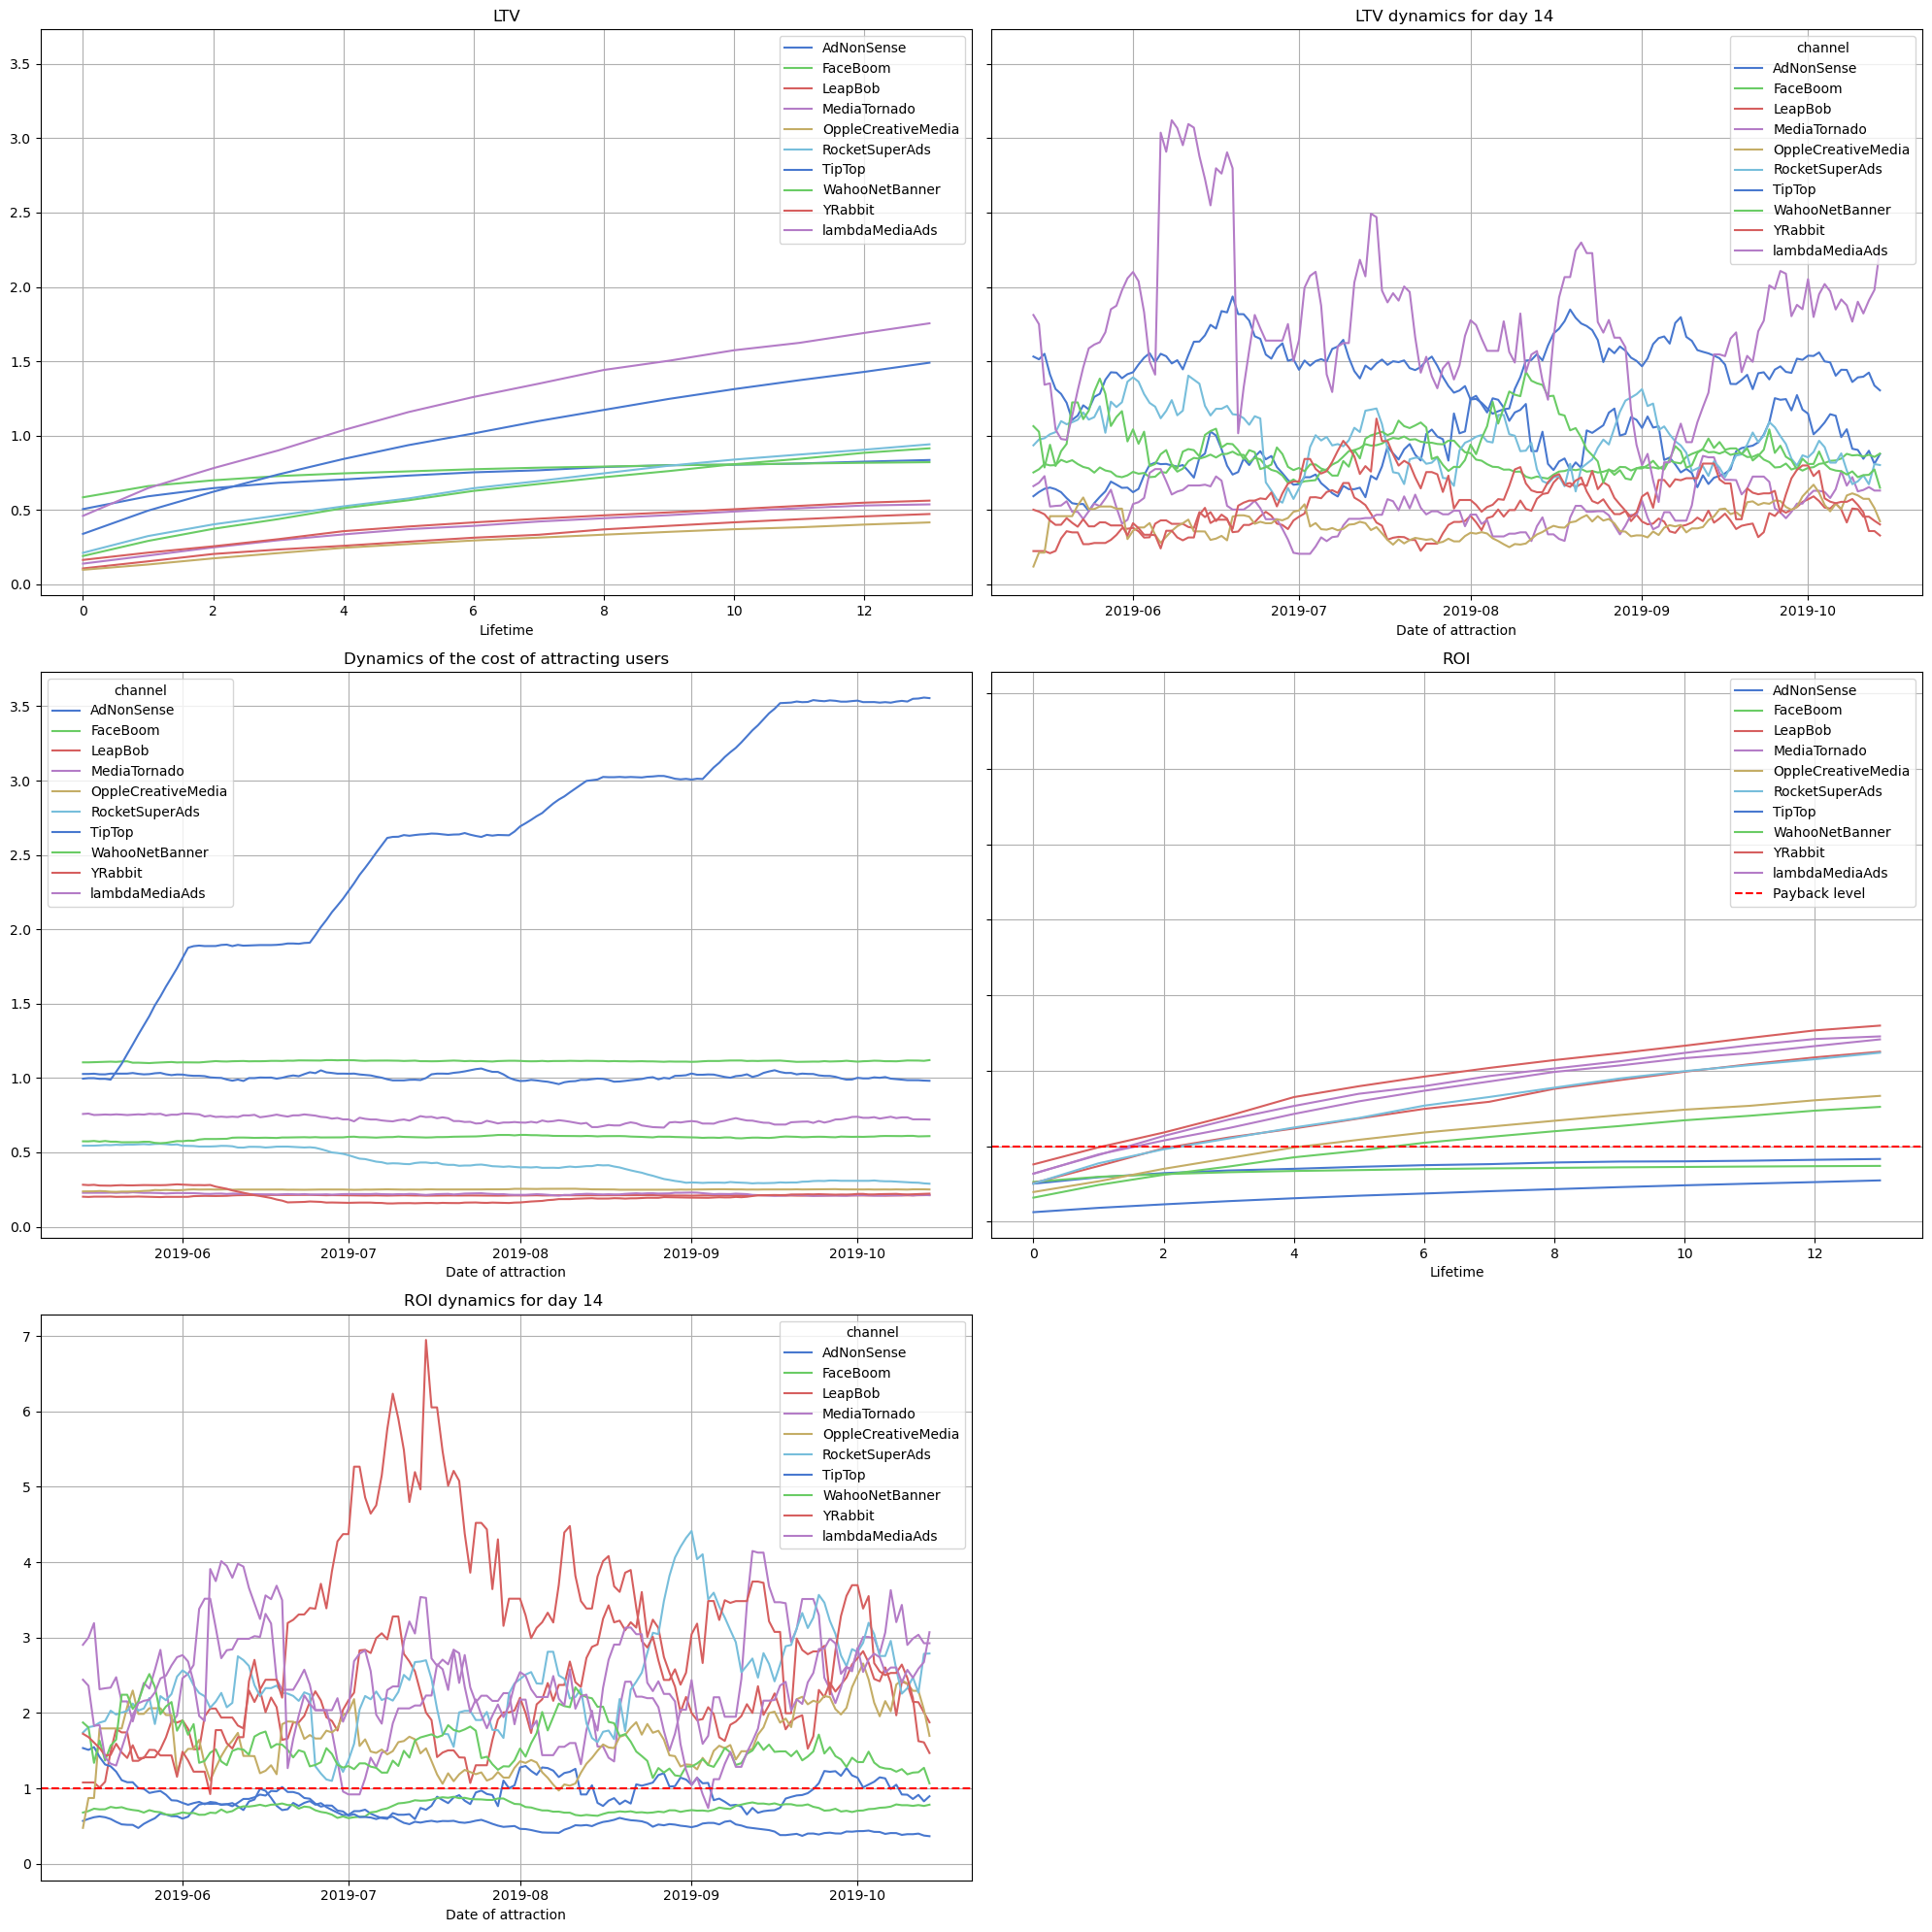

In [45]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Let's choose first five channels.

In [46]:
# calculating LTV and ROI
display(cac_channel.head())

cac
channel            
TipTop         2.80
FaceBoom       1.11
AdNonSense     1.01
lambdaMediaAds 0.72
WahooNetBanner 0.60

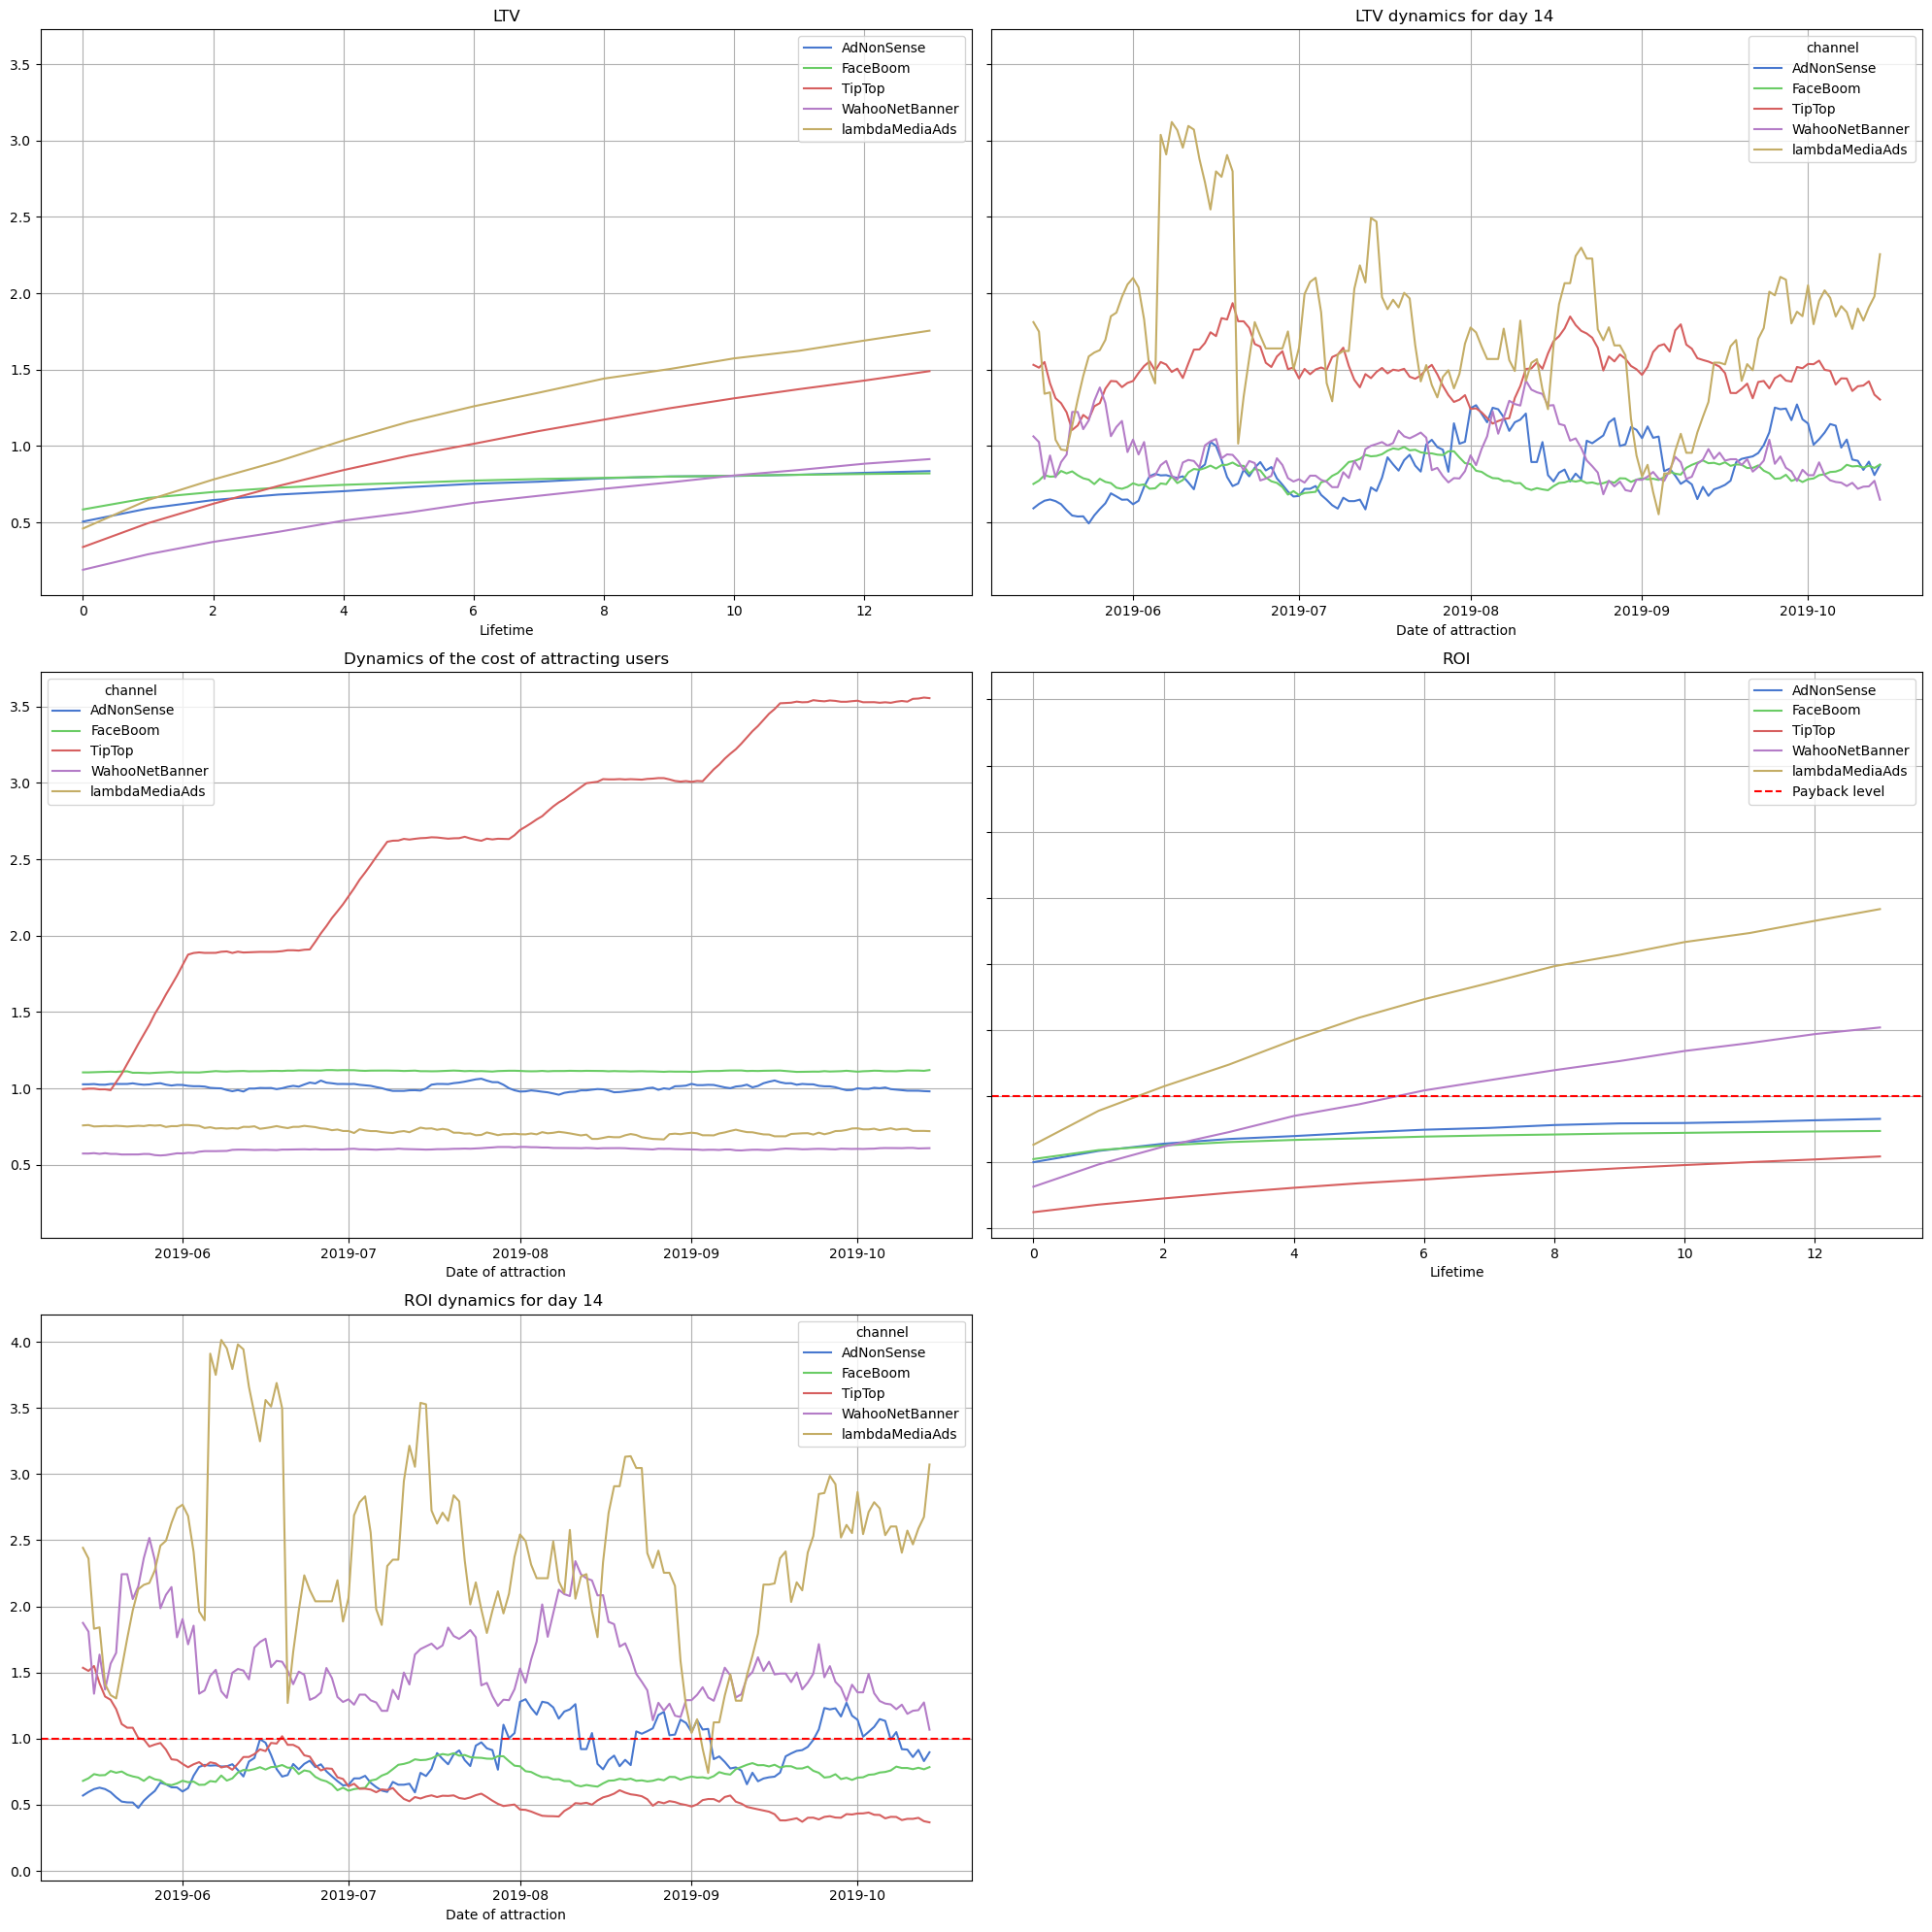

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == ["TipTop", "FaceBoom", "lambdaMediaAds",  "AdNonSense","WahooNetBanner"]')\
    , orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

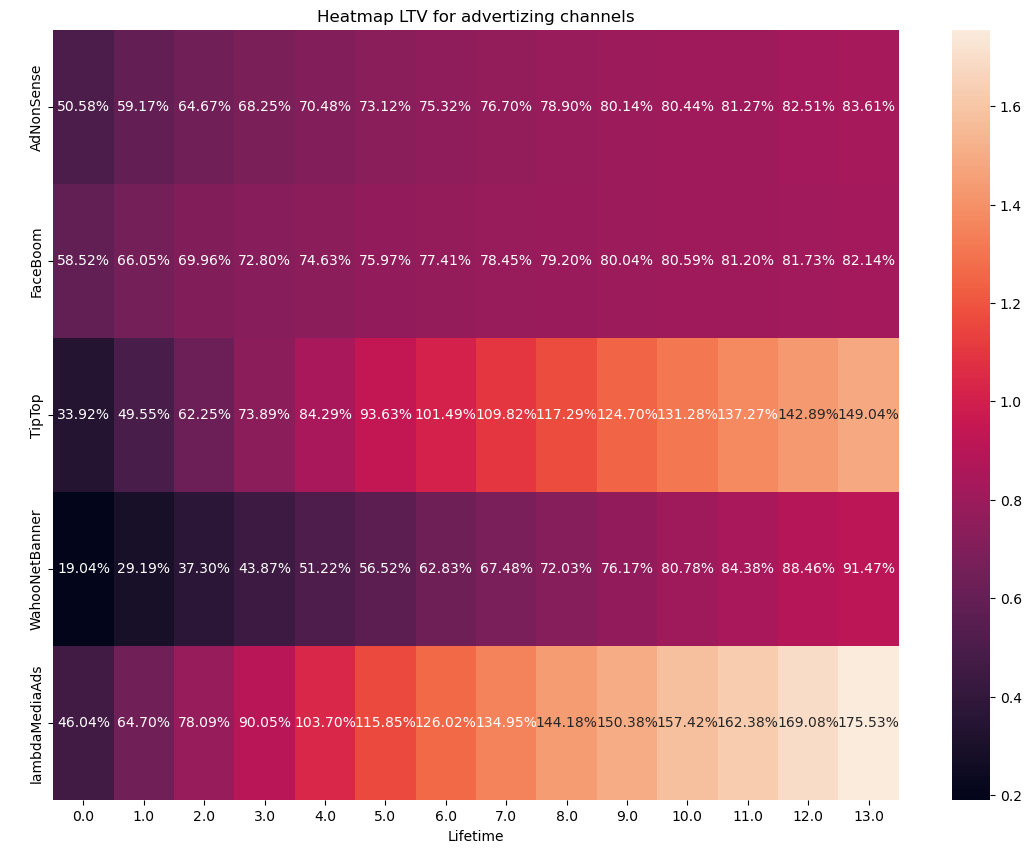

In [48]:
# heatmap LTV
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Heatmap LTV for advertizing channels')
plt.xlabel('Lifetime')
plt.ylabel(' ')
plt.show()

In [49]:
 (
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

**Conclusion**

- On a two-week lifetime, the costs of the first three companies (which spend almost the entire advertising budget) do not pay off;

- Advertising costs in TipTop and Faceboom do not pay off;

- With Tip Top Advertising Costs increasing every month;

- The channels of attraction have an obvious specialization by country;

- Faceboom and Tip top only work for the US market;

- lambdaMediaAds and WahooNetBanner seem to be a promising channel for Europe - low cost of attraction and good indicators of the lifetime value of the client.

### Payback of advertising by country

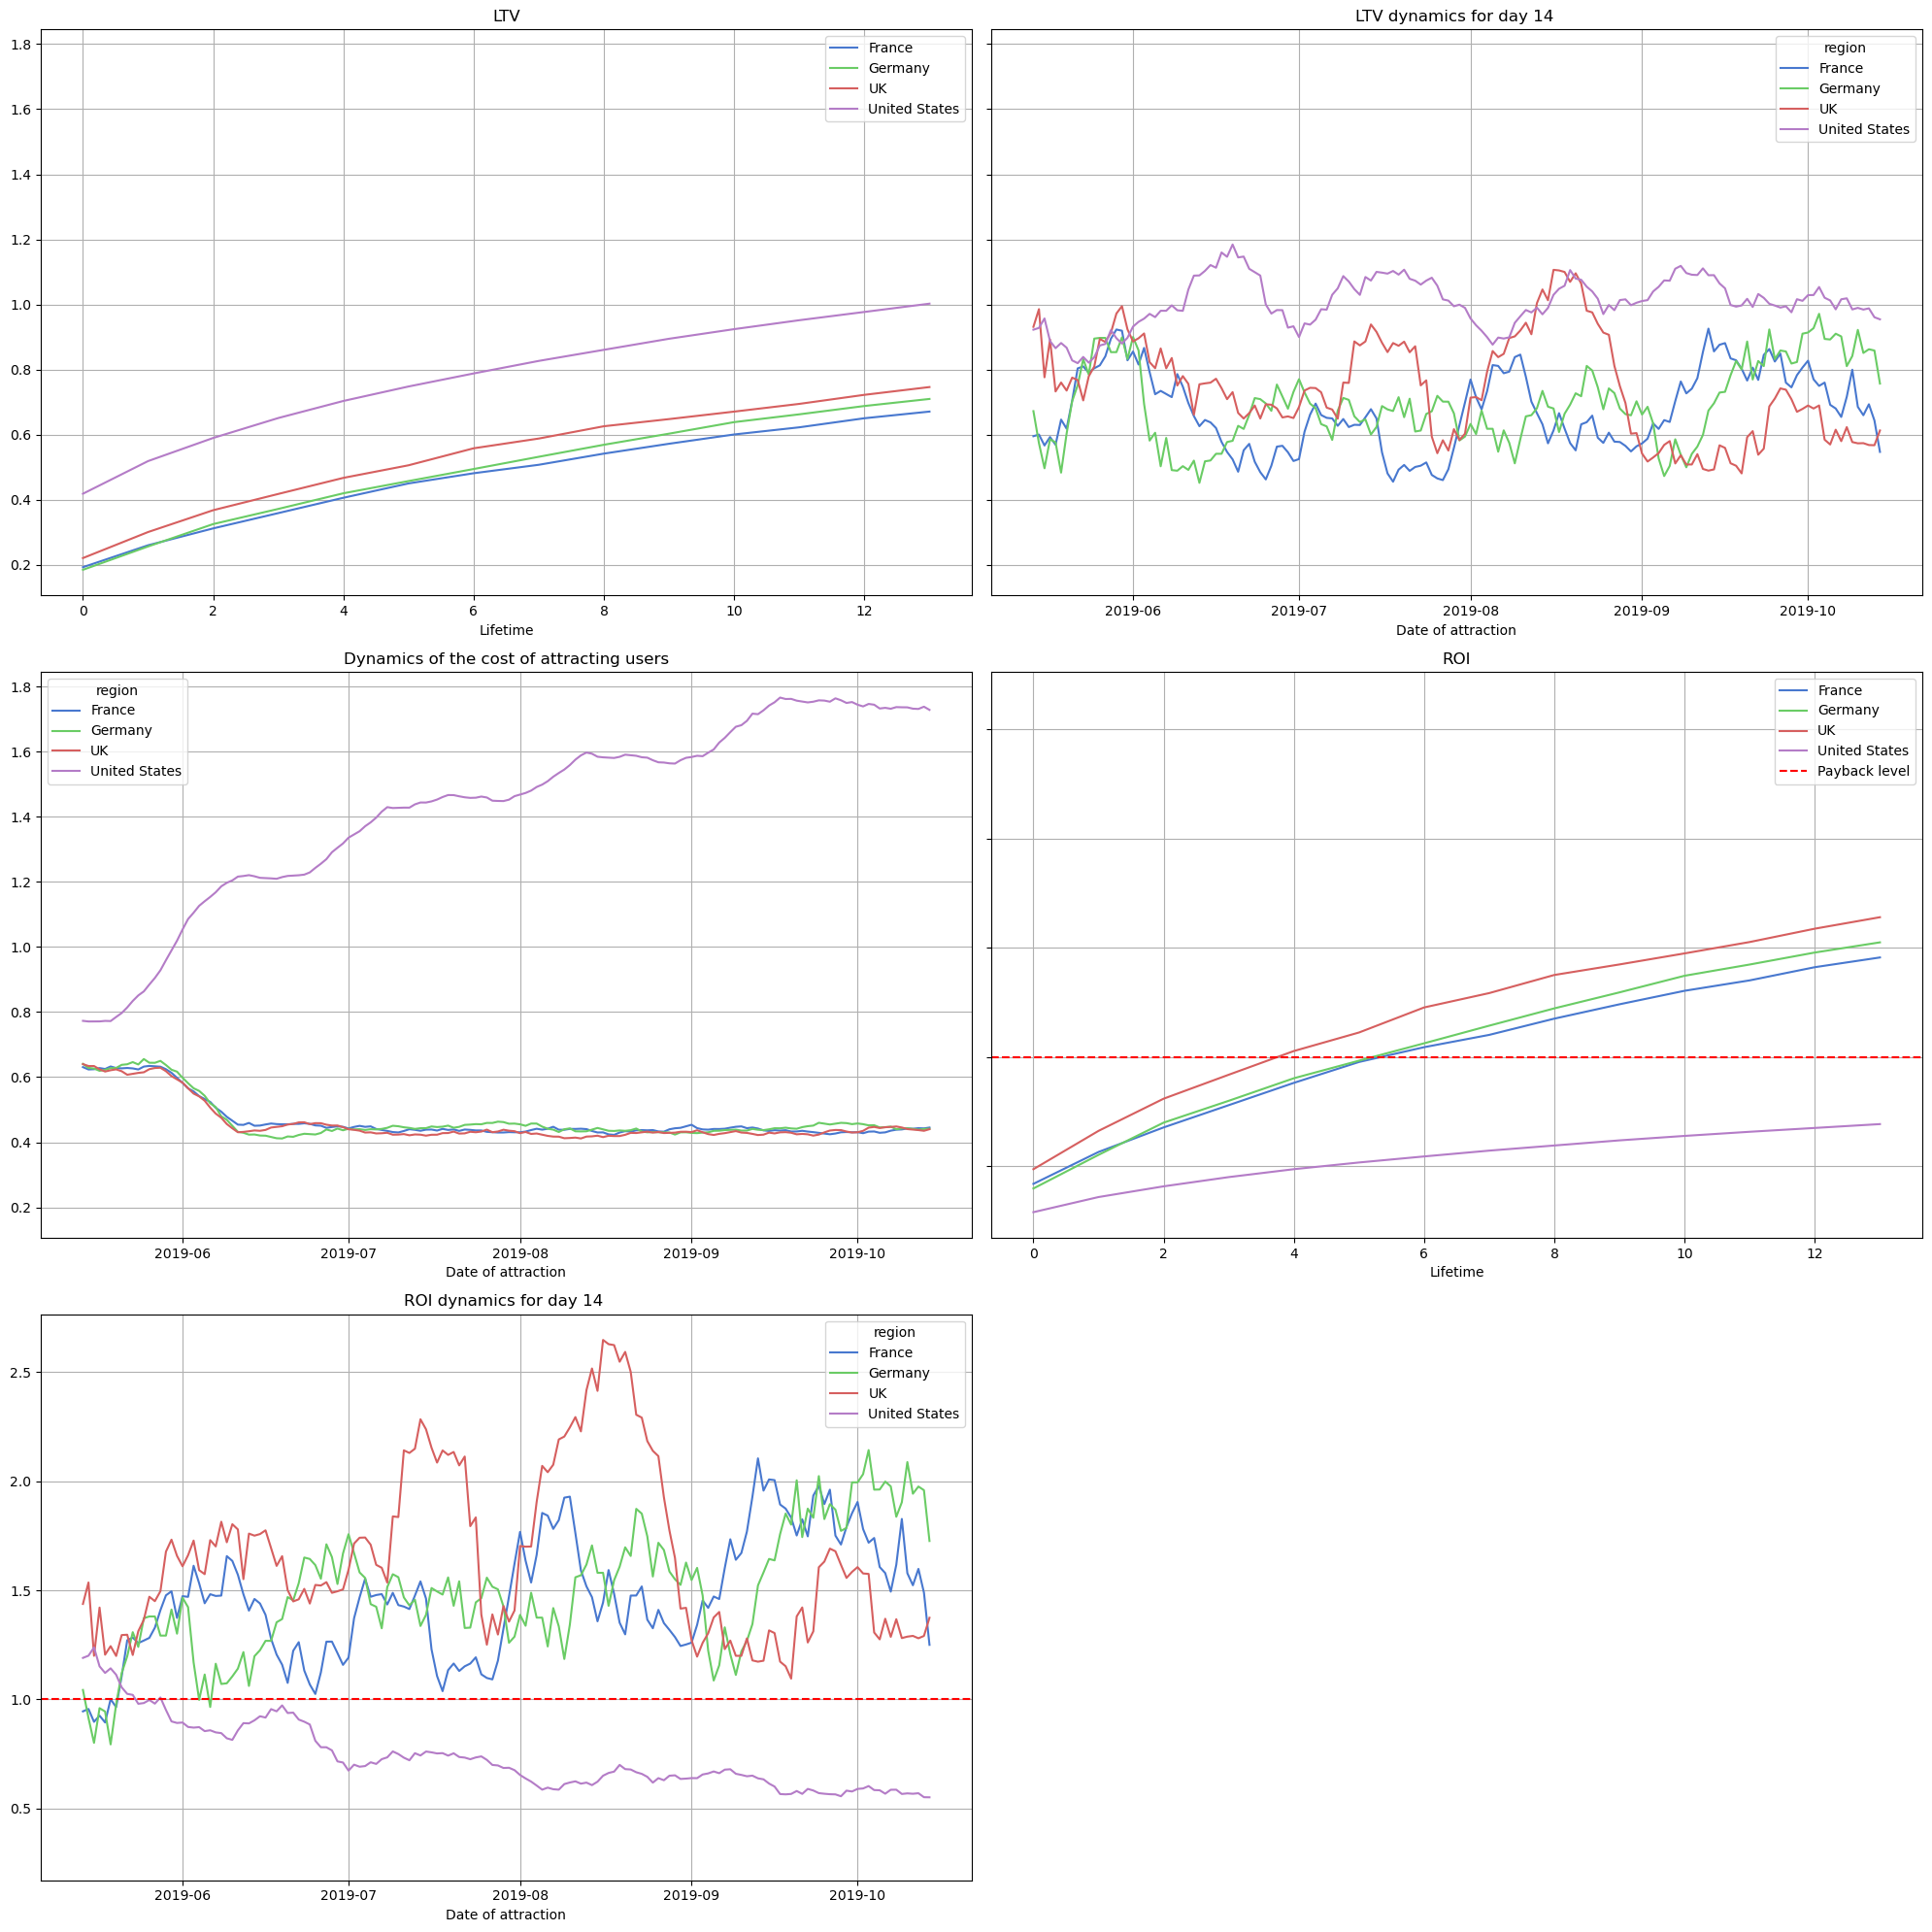

In [50]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Advertising costs in Europe remain unchanged and are paying off, but in the US they are growing and have stopped paying off since June.

### Conversion and retention by device

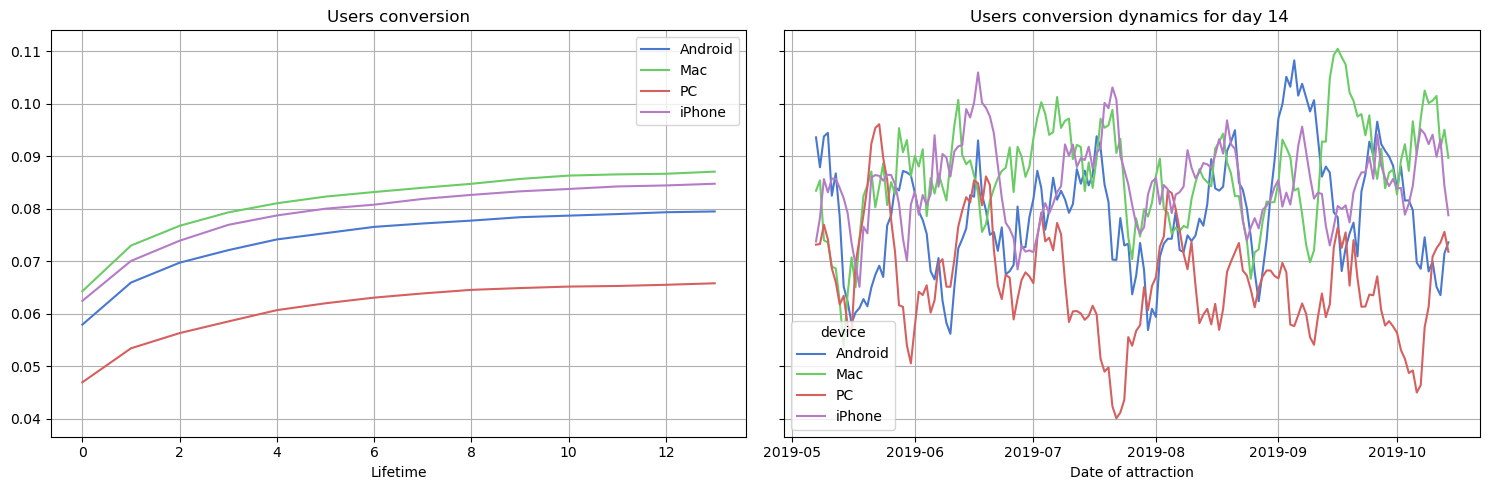

In [51]:
# conversion by device
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Apple devices are among the leaders in conversion. The PC conversion looks the worst of all.

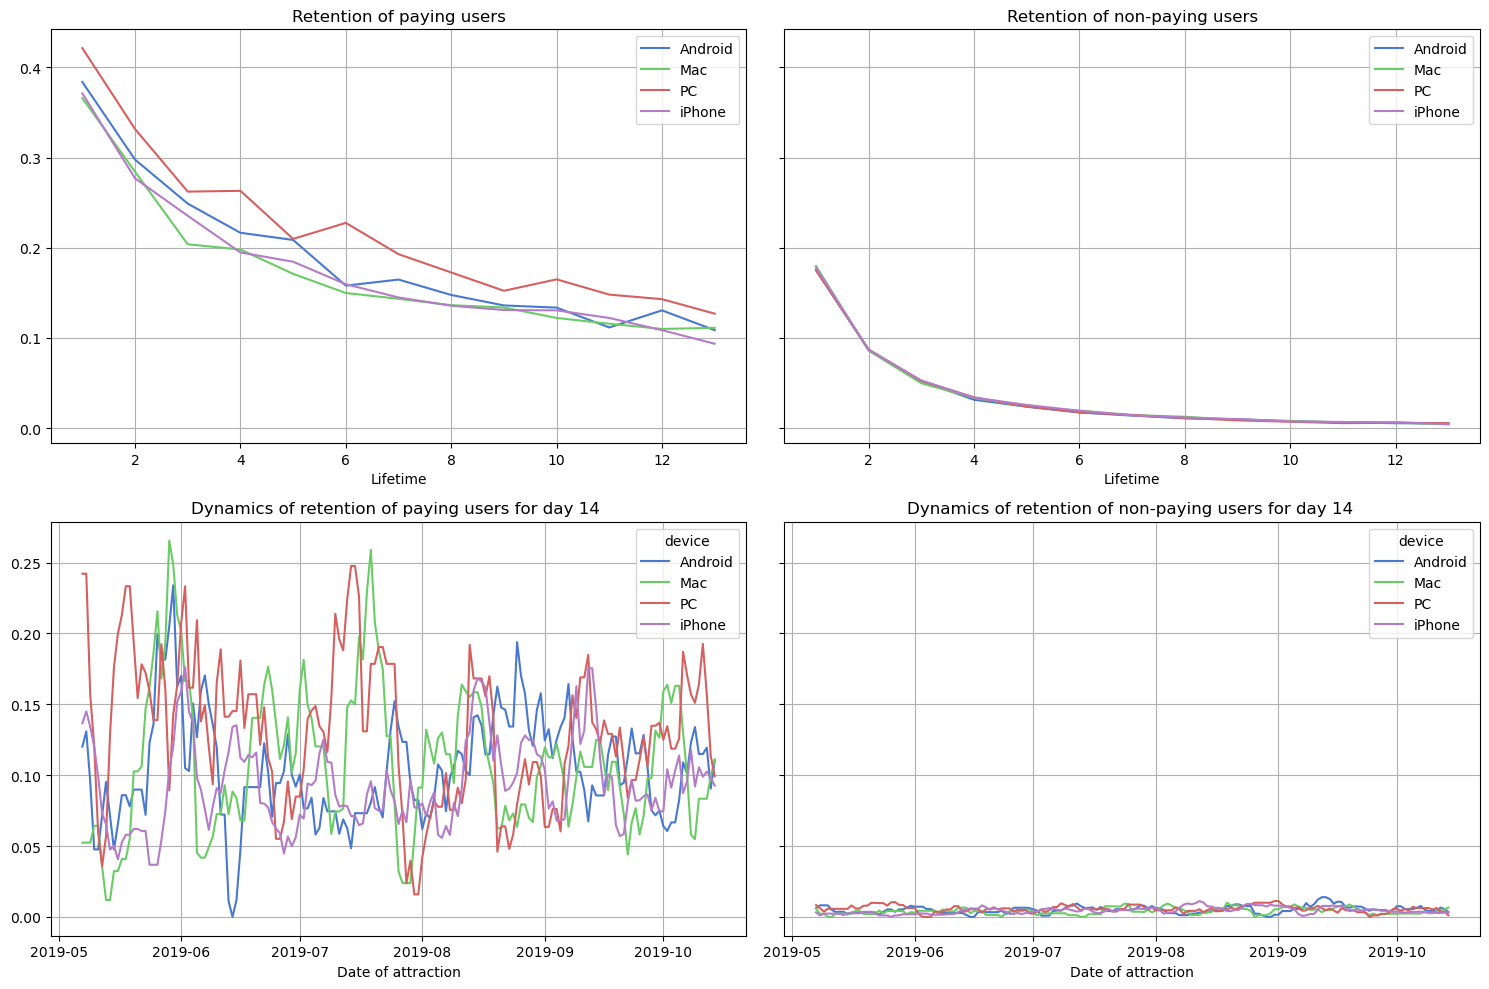

In [52]:
# retention by device

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

User retention depending on the devices does not differ much from each other. The PC conversion looks the best.

### Conversion and retention by country

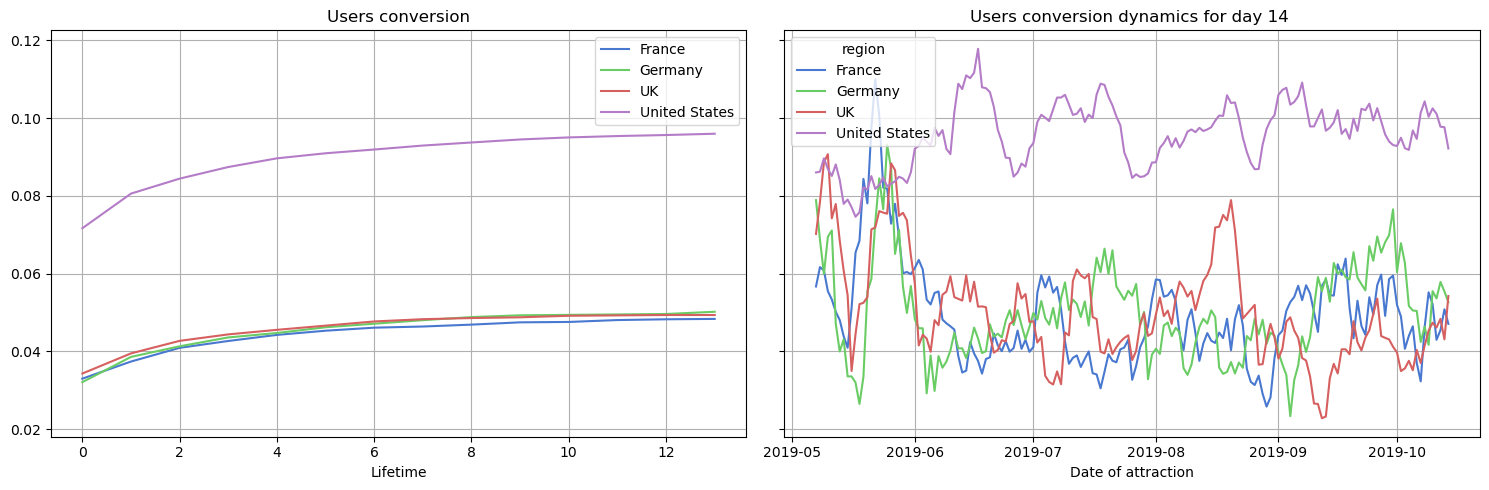

In [53]:
# conversion by country
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

The conversion rate of US users is almost twice as high as the conversion rate of users from other countries.

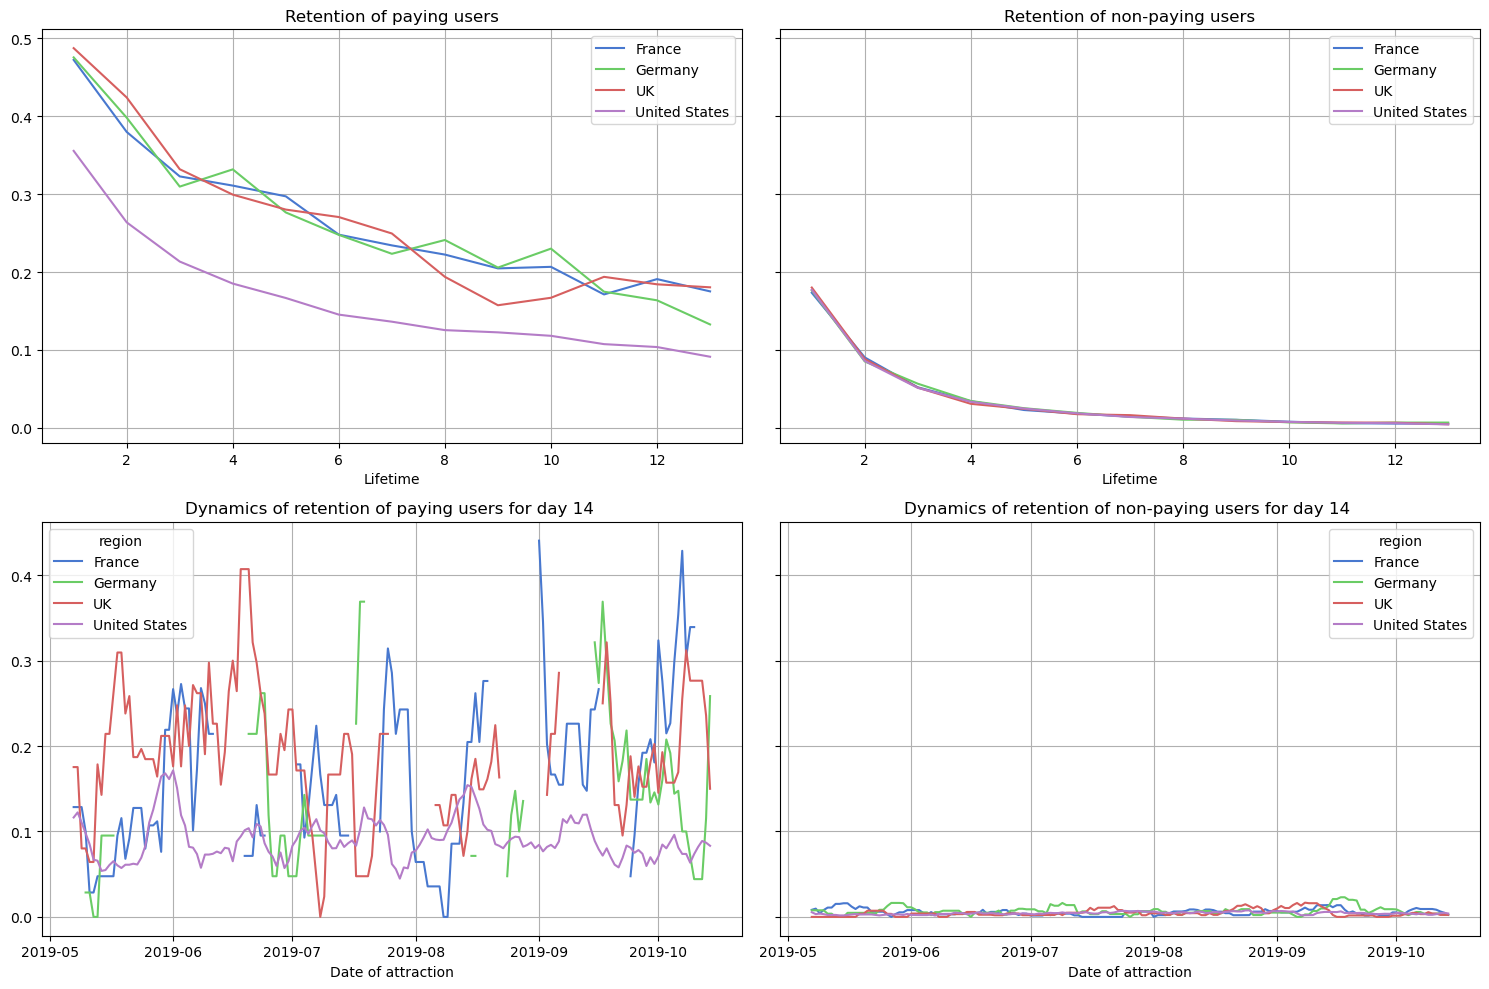

In [54]:
# retention by country

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

US is the worst in conversion.

### Conversion and retention by attraction channels

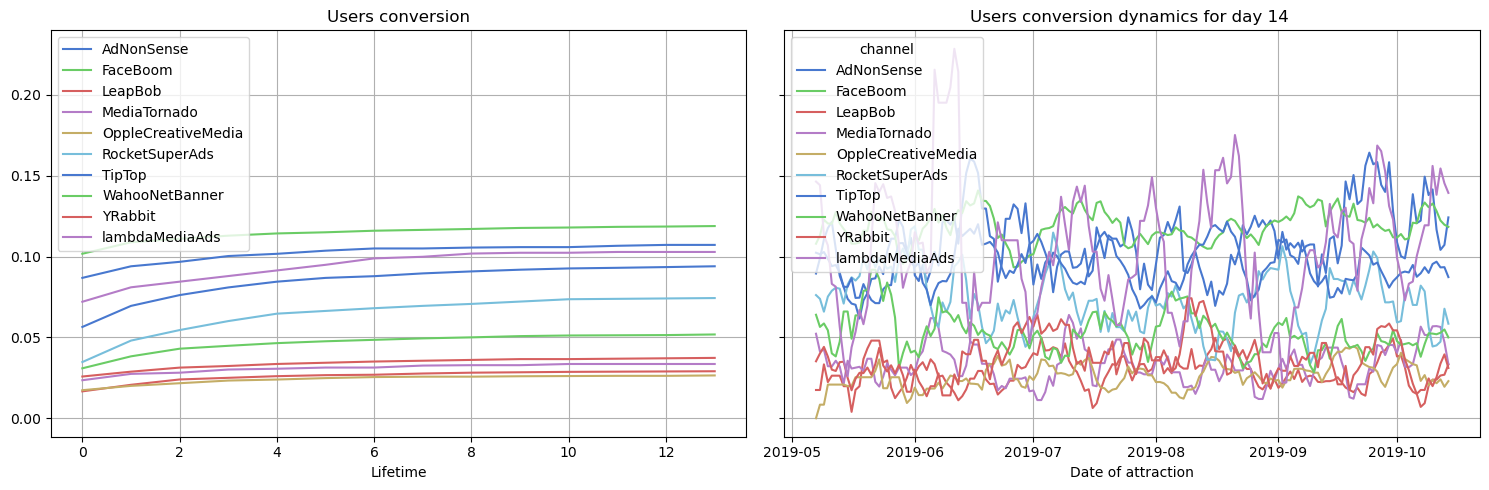

In [55]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

The highest conversion rate is among users attracted through Faceboom.

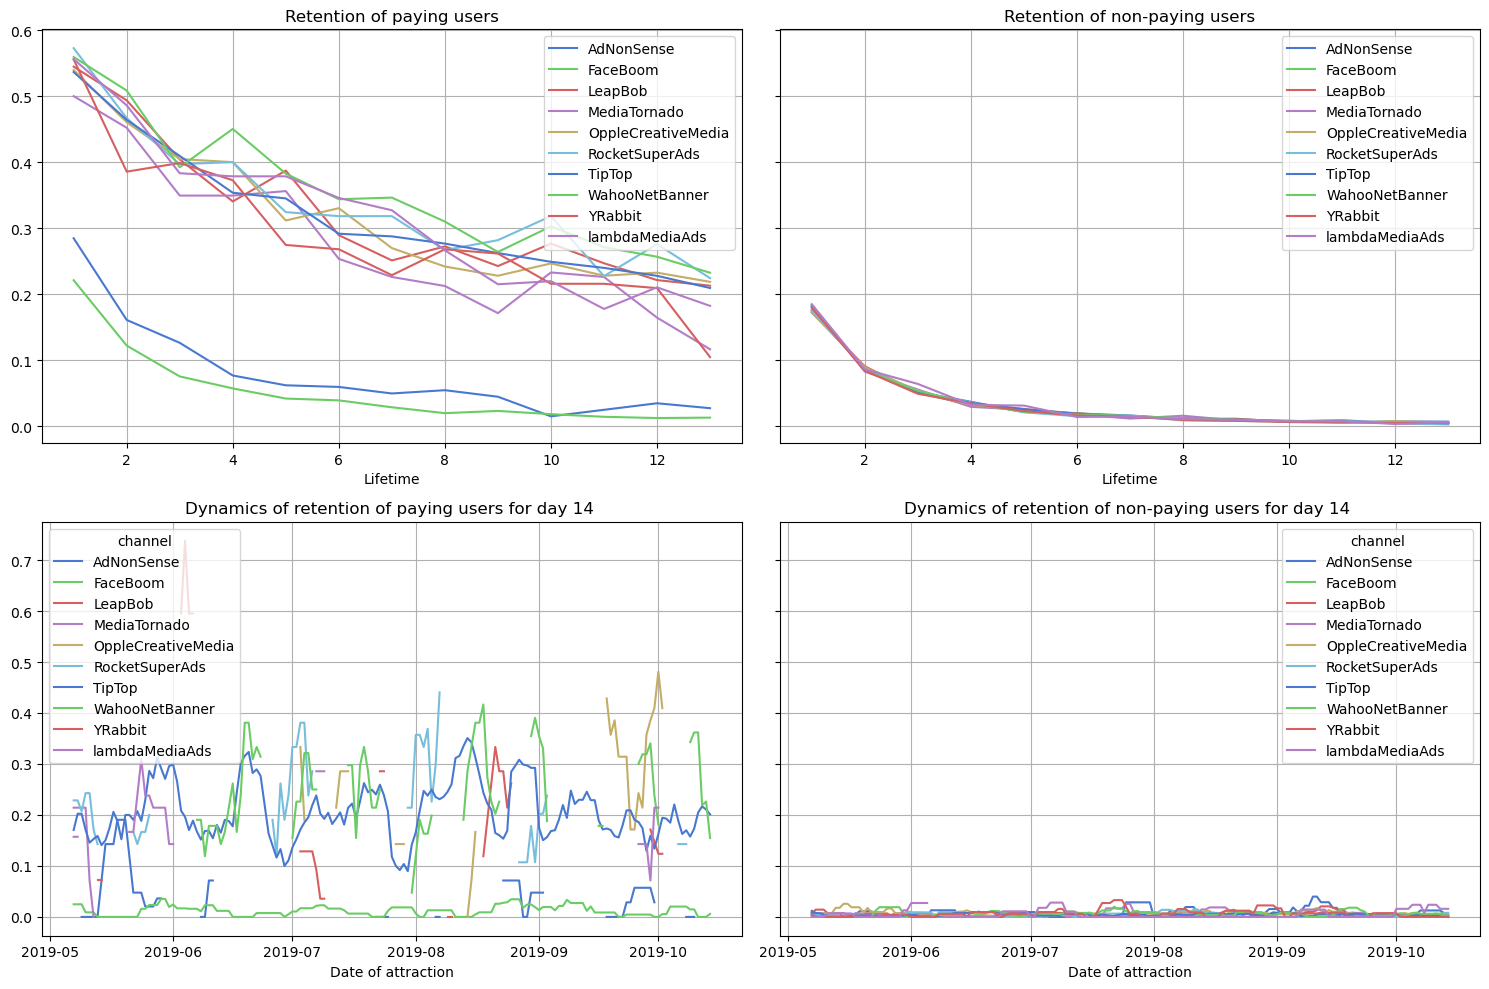

In [56]:
# retention

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Facebook and AdNonSense users are the worst of the paying ones.

**Conclusion**

- in general, advertising does not pay off;

- this is caused by the low payback of advertising in the USA (since most of the app users are from the USA);

- US users are converting more, but there are problems with retaining paying users;

- one of the most problematic channels is Facebook (it does not pay off having the second place in the amount of advertising costs, low retention of paying users); 

- then TipTop - high growth of SAS, as a consequence, it stopped paying off after a month;

- as for devices, PC users are outsiders in the conversion, but at the same time they are holding up well.

## General conclusions and recommendations

The application is available on the European market (Germany, France and the UK) and in the USA.

**Provided data on clients attracted from May 1 to October 27, 2019):**

- server log with data about their visits,
- purchases for this period,
- advertising expenses.
- As a result of the study, it was found that the highest advertising costs spent for the channels FaceBoom, TipTop - in the USA and AdNonSence in Europe (top 3 CAC):

**Conclusion**

- The high cost of attracting users for FaceBoom, TipTop channels with an event horizon of two weeks does not pay off;

- FaceBoom and AdNonSence users are very poorly retained;

- the cost of attracting for TipTop has almost tripled in six months.

**Recommendations**

- Since the overwhelming number of users are from the USA, it seems necessary to reconsider relations with advertisers (for example, to abandon FaceBoom and redirect advertising funds in favor of other channels) or since a large number of users use free to change the pricing policy for the USA,for example, to make some functions paid, add advertising in the application and the ability to remove her for a fee.

-  Try to increase the share of the European market, for example, increase advertising costs in lambdaMediaAds and reduce in AdNonSense.

- Pay attention to the conversion of organic users.